In [136]:
from datetime import datetime
now1 = datetime.now()
print(now1.strftime("%B %d, %Y %I:%M:%S %p"))

May 08, 2025 06:25:55 PM


In [137]:
# This step was created because our group encountered issues running the full code.
# We used the correct version of each library based on solutions found in forums and community discussions to work around errors.
# If you desire to run code, you have to observe if you have these versions.

import sys

# Force check: this will raise an error if not using Python 3.11
print("Current Python version:", sys.version)
assert sys.version.startswith("3.11"), "This is NOT Python 3.11! Please switch to the correct kernel."

# Now import and check all libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import wordcloud
import sklearn
import statsmodels.api as sm
import nltk
import torch
import transformers
import imblearn
import warnings
warnings.filterwarnings("ignore")

versions = {
    "Python": sys.version.split(" ")[0],
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "matplotlib": matplotlib.__version__,
    "seaborn": sns.__version__,
    "wordcloud": wordcloud.__version__,
    "scikit-learn": sklearn.__version__,
    "statsmodels": sm.__version__,
    "nltk": nltk.__version__,
    "torch": torch.__version__,
    "transformers": transformers.__version__,
    "imblearn": imblearn.__version__,}

# Display the results
pd.DataFrame(versions.items(), columns=["Library", "Version"])

Current Python version: 3.11.11 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:34:19) [MSC v.1929 64 bit (AMD64)]


,Library,Version
0,Python,3.11.11
1,pandas,2.2.3
2,numpy,2.1.3
3,matplotlib,3.10.1
4,seaborn,0.13.2
5,wordcloud,1.9.4
6,scikit-learn,1.6.1
7,statsmodels,0.14.4
8,nltk,3.9.1
9,torch,2.7.0+cpu


In [138]:
# ============================================
# Initial Setup
# ============================================
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# ============================================
# Standard Libraries
# ============================================
import os
import sys
import re
import string
import numpy as np
import pandas as pd

# ============================================
# Visualization
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ============================================
# Time Series Analysis (Statsmodels)
# ============================================
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

# ============================================
# Scikit-Learn (ML Models & Evaluation)
# ============================================
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, precision_score, recall_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, precision_recall_curve)

# ============================================
# Imbalanced Data Handling
# ============================================
from imblearn.over_sampling import SMOTE

# ============================================
# Natural Language Processing (NLP) - NLTK
# ============================================
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Uncomment below to download NLTK resources (run once)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.data.path.append(os.path.join(sys.prefix, "nltk_data"))

# ============================================
# Transformers & Deep Learning
# ============================================
from transformers import pipeline
import torch

# ============================================
# Utilities
# ============================================
from pandas.tseries.offsets import DateOffset
import scipy.stats as stats

In [139]:
# Step: Load the dataset
data = pd.read_csv(r"C:\Users\claud\OneDrive\Desktop\DataMining\Datasets\Datasets\Reviews.csv")
print(data.head())

# Step: Cleaning dataset
print("*" * 150)
print("Columns: ", data.columns)
print("*" * 150)
print("Missing Values:\n")
print(data.isnull().sum())
print("*" * 150)
print("Missing Values:", data.isnull().values.any())
print("*" * 150)
print("Missing Values:", data.isnull().values.sum())
print("*" * 150)
print("Shape", data.shape)
print("*" * 150)

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [140]:
# Step: Removing and verifying after Cleaning dataset
data = data.dropna(subset=['Summary', 'ProfileName'])
print("Missing Values:\n")
print(data.isnull().sum())
print("*" * 150)
print("Shape:", data.shape)
print("*" * 150)

Missing Values:

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64
******************************************************************************************************************************************************
Shape: (568401, 10)
******************************************************************************************************************************************************


In [141]:
# Step: Removing score 3 
data = data[data['Score'] != 3]  
data['Sentiment'] = data['Score'].apply(lambda x: 1 if x > 3 else 0)
data['Sentiment'].value_counts()
print("*" * 150)
print("Shape:", data.shape)
print("*" * 150)

******************************************************************************************************************************************************
Shape: (525763, 11)
******************************************************************************************************************************************************


In [142]:
# Step: Converting Datatime 
data['Date'] = pd.to_datetime(data['Time'], unit='s')
print(data[['Time', 'Date']].head())
print("*" * 150)
print(data['Date'].isnull().sum())
print("*" * 150)
print("Shape:", data.shape)
print("*" * 150)

         Time       Date
0  1303862400 2011-04-27
1  1346976000 2012-09-07
2  1219017600 2008-08-18
3  1307923200 2011-06-13
4  1350777600 2012-10-21
******************************************************************************************************************************************************
0
******************************************************************************************************************************************************
Shape: (525763, 12)
******************************************************************************************************************************************************


******************************************************************************************************************************************************
Word Cloud Amazon Reviews - Positive and Negative
******************************************************************************************************************************************************


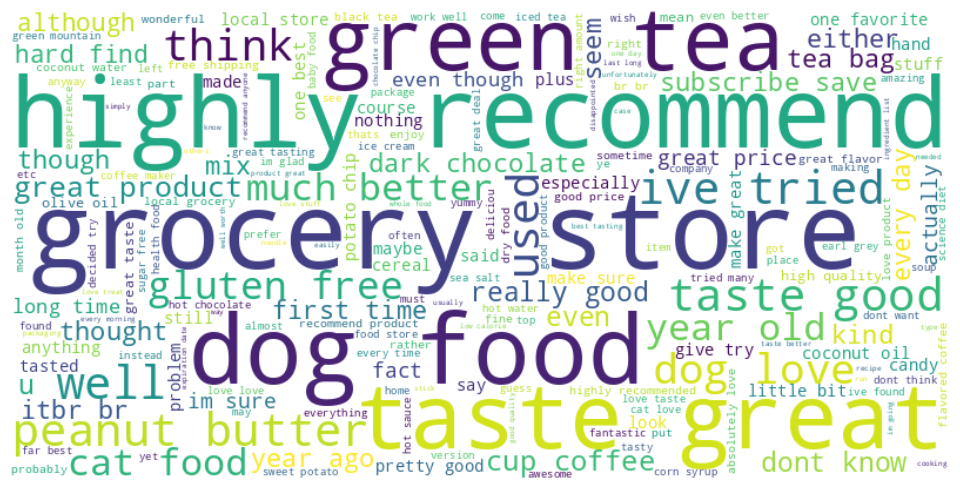

******************************************************************************************************************************************************


In [143]:
# Step: Cleaning text column:
def clean_text(text):
    # Convert all text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # Tokenize the text (split into words)
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join the cleaned tokens back into a single string
    cleaned_text = " ".join(tokens)
    
    return cleaned_text

# Step: Applying the cleaning function to the 'Text' column
data['Cleaned_Text'] = data['Text'].apply(clean_text)

# Step: Combine all texts into a single string
text_data = " ".join(data['Cleaned_Text'].astype(str))

# Step: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Step: Display and save the image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig("wordcloud_amazon_reviews.png", dpi=300)
print("*" * 150)
print("Word Cloud Amazon Reviews - Positive and Negative")
print("*" * 150)
plt.show()
print("*" * 150)

In [144]:
# Step: Filter the cleaned text based on sentiment labels
# Assuming 0 = negative, 1 = positive
negative_text = " ".join(data[data['Sentiment'] == 0]['Cleaned_Text'])
positive_text = " ".join(data[data['Sentiment'] == 1]['Cleaned_Text'])

******************************************************************************************************************************************************


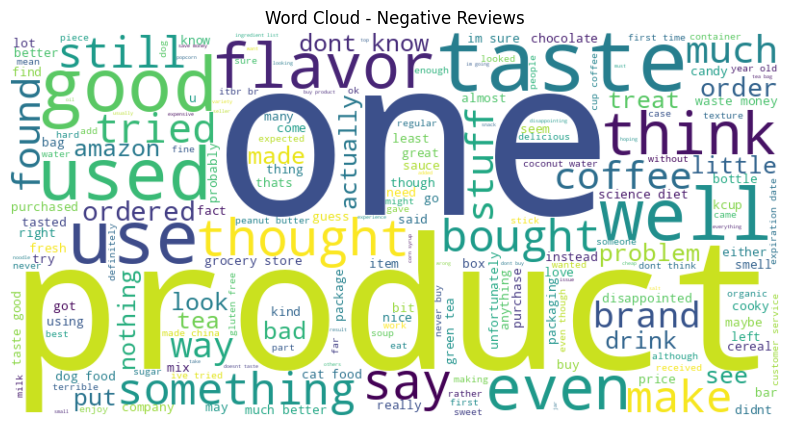

******************************************************************************************************************************************************
******************************************************************************************************************************************************


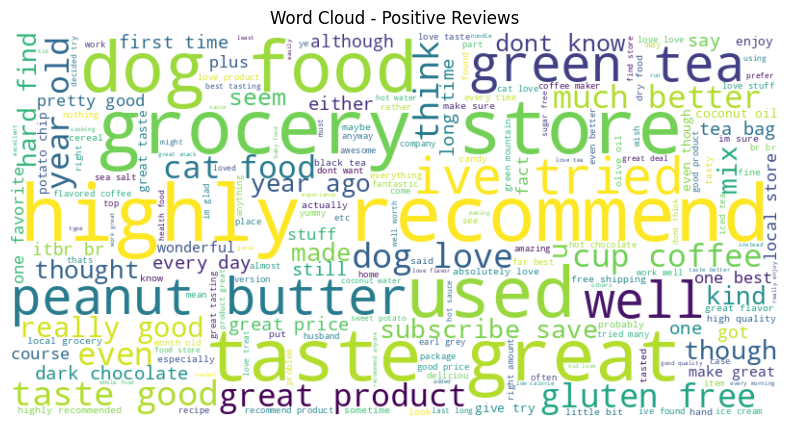

******************************************************************************************************************************************************


In [145]:
# Step: Word Cloud for Negative Reviews
print("*" * 150)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()
print("*" * 150)

# Step: Word Cloud for Positive Reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
print("*" * 150)
plt.show()
print("*" * 150)

In [146]:
# Step : Verifying new informations
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Date,Cleaned_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,2011-04-27,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,2012-09-07,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,2008-08-18,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,2011-06-13,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,2012-10-21,great taffy great price wide assortment yummy ...


In [147]:
# Step: Define features and target
X = data['Cleaned_Text']
y = data['Sentiment']

# Step: Split the text data (still in raw form)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train)  
X_test = tfidf.transform(X_test)
  
# Step: Check the distribution of the target classes
print(y_train.value_counts())
print("*" * 150)

# Step: Check the percentage (relative frequency) of each class
print(y_train.value_counts(normalize=True))

Sentiment
1    355004
0     65606
Name: count, dtype: int64
******************************************************************************************************************************************************
Sentiment
1    0.844022
0    0.155978
Name: proportion, dtype: float64


In [148]:
# Step: Applying Logistic Regression
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

,Logistic Regression
Accuracy,0.894316
Precision,0.978739
Recall,0.894211
F1 Score,0.934567
ROC AUC,0.958637
True Negatives,14677.000000
False Positives,1724.000000
False Negatives,9389.000000
True Positives,79363.000000


******************************************************************************************************************************************************

 Report:
              precision    recall  f1-score   support

           0       0.61      0.89      0.73     16401
           1       0.98      0.89      0.93     88752

    accuracy                           0.89    105153
   macro avg       0.79      0.89      0.83    105153
weighted avg       0.92      0.89      0.90    105153

******************************************************************************************************************************************************


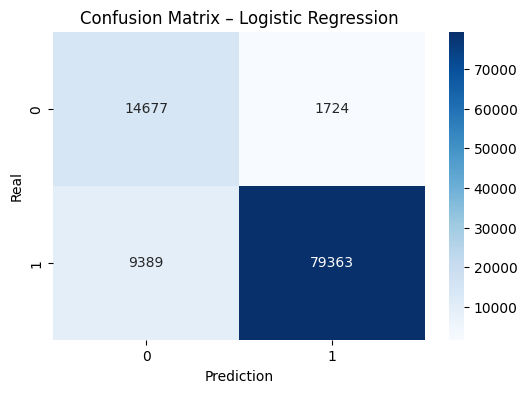

******************************************************************************************************************************************************


In [149]:
# Step: Prediction with Logistic Regression
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]  

# Step: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step: Summary of metrics
metrics_summary = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba),
    'True Negatives': cm[0, 0],
    'False Positives': cm[0, 1],
    'False Negatives': cm[1, 0],
    'True Positives': cm[1, 1]}
metrics_df_lr = pd.DataFrame(metrics_summary, index=['Logistic Regression']).T
display(metrics_df_lr)
print("*" * 150)

# Step: Classification report by class
print("\n Report:")
print(classification_report(y_test, y_pred))
print("*" * 150)

# Step: Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()
print("*" * 150)


In [150]:
# Step: Applying Decision tree
tree_model = DecisionTreeClassifier(class_weight='balanced')
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

,Decision Tree
Accuracy,0.895058
Precision,0.944651
Recall,0.930165
F1 Score,0.937352
ROC AUC,0.817613
True Negatives,11564.000000
False Positives,4837.000000
False Negatives,6198.000000
True Positives,82554.000000


******************************************************************************************************************************************************

Full classification report – Decision Tree:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68     16401
           1       0.94      0.93      0.94     88752

    accuracy                           0.90    105153
   macro avg       0.80      0.82      0.81    105153
weighted avg       0.90      0.90      0.90    105153

******************************************************************************************************************************************************


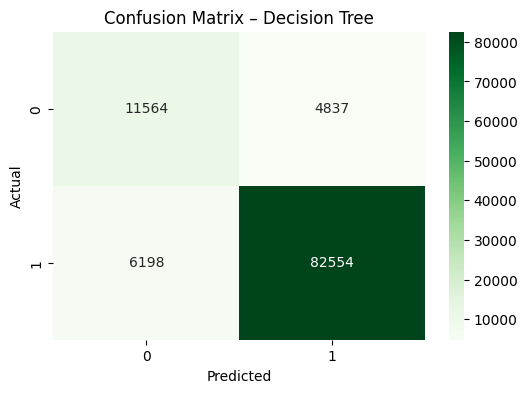

******************************************************************************************************************************************************


In [151]:
# Step: Predictions with Decision Tree
y_pred_tree = tree_model.predict(X_test)
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Step: Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Step: Summary of metrics
metrics_tree = {
    'Accuracy': accuracy_score(y_test, y_pred_tree),
    'Precision': precision_score(y_test, y_pred_tree),
    'Recall': recall_score(y_test, y_pred_tree),
    'F1 Score': f1_score(y_test, y_pred_tree),
    'ROC AUC': roc_auc_score(y_test, y_proba_tree),
    'True Negatives': cm_tree[0, 0],
    'False Positives': cm_tree[0, 1],
    'False Negatives': cm_tree[1, 0],
    'True Positives': cm_tree[1, 1]}
metrics_df_tree = pd.DataFrame(metrics_tree, index=['Decision Tree']).T
display(metrics_df_tree)
print("*" * 150)

# Step: Classification report by class
print("\nFull classification report – Decision Tree:")
print(classification_report(y_test, y_pred_tree))
print("*" * 150)


# Step: Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Decision Tree")
plt.show()
print("*" * 150)

In [152]:
# Step: Balance the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step: Train the MLP on balanced data
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)
mlp_model.fit(X_train_resampled, y_train_resampled)

MLPClassifier(max_iter=100, random_state=42)

,Neural Network
Accuracy,0.948998
Precision,0.968420
Recall,0.971246
F1 Score,0.969831
ROC AUC,0.971980
True Negatives,13590.000000
False Positives,2811.000000
False Negatives,2552.000000
True Positives,86200.000000


******************************************************************************************************************************************************

Full classification report – Neural Network:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     16401
           1       0.97      0.97      0.97     88752

    accuracy                           0.95    105153
   macro avg       0.91      0.90      0.90    105153
weighted avg       0.95      0.95      0.95    105153

******************************************************************************************************************************************************


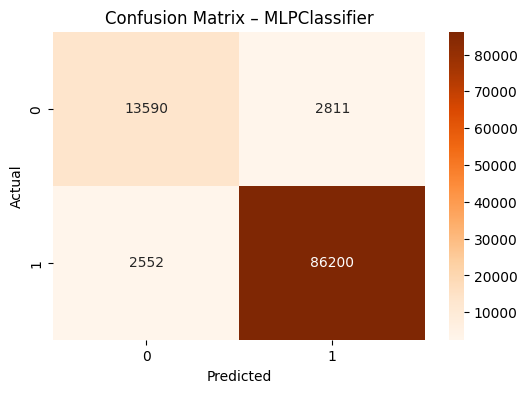

******************************************************************************************************************************************************


In [153]:
# Step: Predictions with MLP
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Step: Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Step: Summary of metrics
metrics_mlp = {
    'Accuracy': accuracy_score(y_test, y_pred_mlp),
    'Precision': precision_score(y_test, y_pred_mlp),
    'Recall': recall_score(y_test, y_pred_mlp),
    'F1 Score': f1_score(y_test, y_pred_mlp),
    'ROC AUC': roc_auc_score(y_test, y_proba_mlp),
    'True Negatives': cm_mlp[0, 0],
    'False Positives': cm_mlp[0, 1],
    'False Negatives': cm_mlp[1, 0],
    'True Positives': cm_mlp[1, 1]}
metrics_df_mlp = pd.DataFrame(metrics_mlp, index=['Neural Network']).T
display(metrics_df_mlp)
print("*" * 150)

# Step: Classification report by class
print("\nFull classification report – Neural Network:")
print(classification_report(y_test, y_pred_mlp))
print("*" * 150)

# Step: Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – MLPClassifier")
plt.show()
print("*" * 150)


In [154]:
# Step: Automatically compute class priors from training labels
total = len(y_train)
p_neg = sum(y_train == 0) / total
p_pos = sum(y_train == 1) / total

# Setp: Print to verify
print(f"Class 0 (negative): {p_neg:.2%}, Class 1 (positive): {p_pos:.2%}")

# Step: Create the model with calculated class priors
nb_model = MultinomialNB(class_prior=[p_neg, p_pos])

# Step: Fit the model
nb_model.fit(X_train, y_train)

Class 0 (negative): 15.60%, Class 1 (positive): 84.40%


MultinomialNB(class_prior=[0.1559782221059889, 0.8440217778940111])

,Naive Bayes
Accuracy,0.880973
Precision,0.879359
Recall,0.995561
F1 Score,0.933859
ROC AUC,0.936676
True Negatives,4279.000000
False Positives,12122.000000
False Negatives,394.000000
True Positives,88358.000000


******************************************************************************************************************************************************

Full classification report – Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.26      0.41     16401
           1       0.88      1.00      0.93     88752

    accuracy                           0.88    105153
   macro avg       0.90      0.63      0.67    105153
weighted avg       0.89      0.88      0.85    105153

******************************************************************************************************************************************************


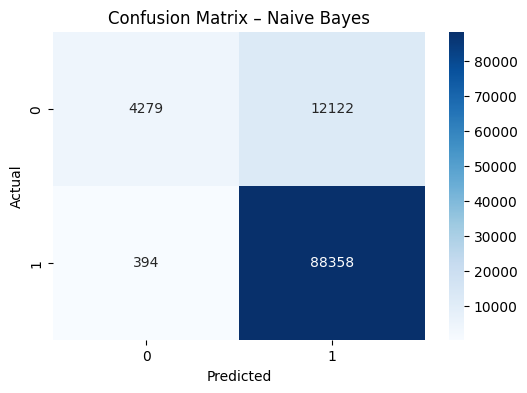

******************************************************************************************************************************************************


In [155]:
# Step: Predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Step: Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Step: Summary of metrics
metrics_nb = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1 Score': f1_score(y_test, y_pred_nb),
    'ROC AUC': roc_auc_score(y_test, y_proba_nb),
    'True Negatives': cm_nb[0, 0],
    'False Positives': cm_nb[0, 1],
    'False Negatives': cm_nb[1, 0],
    'True Positives': cm_nb[1, 1]}
metrics_df_nb = pd.DataFrame(metrics_nb, index=['Naive Bayes']).T
display(metrics_df_nb)
print("*" * 150)

# Step: Classification report by class
print("\nFull classification report – Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("*" * 150)

# Step: Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Naive Bayes")
plt.show()
print("*" * 150)


In [156]:
# Step: Applying Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

,Random Forest
Accuracy,0.939117
Precision,0.938508
Recall,0.992924
F1 Score,0.964949
ROC AUC,0.973678
True Negatives,10627.000000
False Positives,5774.000000
False Negatives,628.000000
True Positives,88124.000000


******************************************************************************************************************************************************

Full classification report – Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     16401
           1       0.94      0.99      0.96     88752

    accuracy                           0.94    105153
   macro avg       0.94      0.82      0.87    105153
weighted avg       0.94      0.94      0.93    105153

******************************************************************************************************************************************************


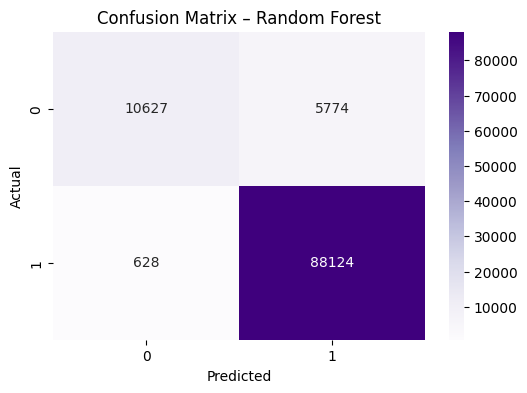

******************************************************************************************************************************************************


In [157]:
# Step: Predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Step: Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Step: Summary of metrics
metrics_rf = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_proba_rf),
    'True Negatives': cm_rf[0, 0],
    'False Positives': cm_rf[0, 1],
    'False Negatives': cm_rf[1, 0],
    'True Positives': cm_rf[1, 1]}
metrics_df_rf = pd.DataFrame(metrics_rf, index=['Random Forest']).T
display(metrics_df_rf)
print("*" * 150)
    
# Step: Classification report by class
print("\nFull classification report – Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("*" * 150)

# Step: Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()
print("*" * 150)

In [158]:
# Step: Build the comparison DataFrame
comparison_df = pd.concat([
    metrics_df_lr,
    metrics_df_tree,
    metrics_df_mlp,
    metrics_df_nb,
    metrics_df_rf], axis=1)

# Step: Transpose to have models as rows
comparison_df = comparison_df.T
display(comparison_df)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,True Negatives,False Positives,False Negatives,True Positives
Logistic Regression,0.894316,0.978739,0.894211,0.934567,0.958637,14677.0,1724.0,9389.0,79363.0
Decision Tree,0.895058,0.944651,0.930165,0.937352,0.817613,11564.0,4837.0,6198.0,82554.0
Neural Network,0.948998,0.968420,0.971246,0.969831,0.971980,13590.0,2811.0,2552.0,86200.0
Naive Bayes,0.880973,0.879359,0.995561,0.933859,0.936676,4279.0,12122.0,394.0,88358.0
Random Forest,0.939117,0.938508,0.992924,0.964949,0.973678,10627.0,5774.0,628.0,88124.0


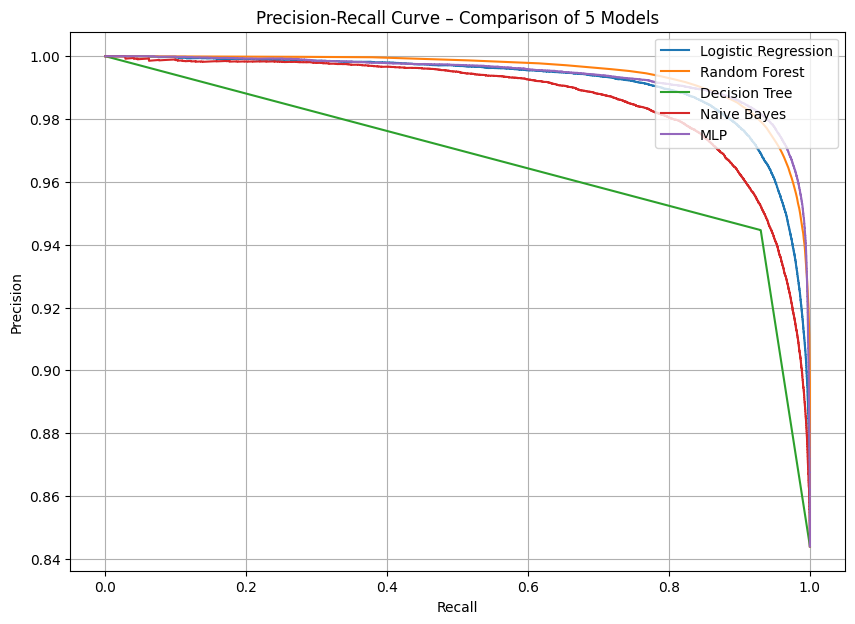

In [159]:
# Step: Save copies of X_test and y_test before any further modifications
X_test_sentiment = X_test.copy()
y_test_sentiment = y_test.copy()

# Step: Define helper function to compute precision-recall curves
def compute_pr(model, X_test, y_test, label):
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    return recall, precision, label

# Step: Generate precision-recall curves for all 5 models
pr_curves = []
pr_curves.append(compute_pr(lr_model, X_test_sentiment, y_test_sentiment, 'Logistic Regression'))
pr_curves.append(compute_pr(rf_model, X_test_sentiment, y_test_sentiment, 'Random Forest'))
pr_curves.append(compute_pr(tree_model, X_test_sentiment, y_test_sentiment, 'Decision Tree'))
pr_curves.append(compute_pr(nb_model, X_test_sentiment, y_test_sentiment, 'Naive Bayes'))
pr_curves.append(compute_pr(mlp_model, X_test_sentiment, y_test_sentiment, 'MLP'))

# Step: Plot precision-recall curves
plt.figure(figsize=(10, 7))
for recall, precision, label in pr_curves:
    plt.plot(recall, precision, label=label)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve – Comparison of 5 Models')
plt.legend(loc='upper right')
plt.grid()
plt.show()


In [160]:
# Step: Create metrics dictionary# Step: Sample 10,000 rows for efficiency
sample = data.sample(50000, random_state=42).copy()

# Step: Apply existing clean_text function to Summary
sample["Cleaned_Summary"] = sample["Summary"].astype(str).apply(clean_text)

# Step: Ensure Cleaned_Text is in the sample (copy from original)
sample["Cleaned_Text"] = sample["Cleaned_Text"].astype(str)

# Step: Load Hugging Face sentiment analysis pipeline
classifier = pipeline(
    "text-classification",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    framework="pt",
    device=-1)

# Step: Apply model to different text columns with truncation enabled
text_sentiments = classifier(sample["Text"].tolist(), batch_size=32, truncation=True)
sample["Text_Label"] = [1 if r["label"] == "POSITIVE" else 0 for r in text_sentiments]

cleaned_text_sentiments = classifier(sample["Cleaned_Text"].tolist(), batch_size=32, truncation=True)
sample["Cleaned_Label"] = [1 if r["label"] == "POSITIVE" else 0 for r in cleaned_text_sentiments]

summary_sentiments = classifier(sample["Summary"].tolist(), batch_size=32, truncation=True)
sample["Summary_Label"] = [1 if r["label"] == "POSITIVE" else 0 for r in summary_sentiments]

cleaned_summary_sentiments = classifier(sample["Cleaned_Summary"].tolist(), batch_size=32, truncation=True)
sample["Cleaned_Summary_Label"] = [1 if r["label"] == "POSITIVE" else 0 for r in cleaned_summary_sentiments]

# Step: Build comparison DataFrame (percentage of positive/negative)
comparison_df = pd.DataFrame({
    'By Score': sample['Sentiment'].value_counts(normalize=True) * 100,
    'By Text': sample['Text_Label'].value_counts(normalize=True) * 100,
    'By Cleaned Text': sample['Cleaned_Label'].value_counts(normalize=True) * 100,
    'By Summary': sample['Summary_Label'].value_counts(normalize=True) * 100,
    'By Cleaned Summary': sample['Cleaned_Summary_Label'].value_counts(normalize=True) * 100
}).rename(index={0: 'Negative', 1: 'Positive'})

# Step: Round and display
comparison_df = comparison_df.round(2)
display(comparison_df)

Device set to use cpu


,By Score,By Text,By Cleaned Text,By Summary,By Cleaned Summary
Negative,15.4,27.63,50.31,24.36,22.25
Positive,84.6,72.37,49.69,75.64,77.75


In [161]:
# Step: Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])
print(data[['Date']].isnull().sum())
print("*" * 150)

# Step: Export to CSV for manual inspection
data.to_csv(r"C:\Users\claud\OneDrive\Desktop\data_exported.csv", index=False)
print(data.shape)
print("*" * 150)

# Step: Aggregate by month
monthly_data = data.resample('M', on='Date').agg({
    'Score': 'mean',
    'Sentiment': 'mean',
    'Id': 'count'}).rename(columns={'Id': 'NumReviews'})
print(monthly_data.isnull().sum())
print("*" * 150)

# Step: Create a column for the negative review rate
monthly_data['NegativeRate'] = 1 - monthly_data['Sentiment']
print(monthly_data['NegativeRate'].isnull().sum())
print("*" * 150)

# Step: Trim data starting from the last month with NaN
last_nan_date = monthly_data[monthly_data['NegativeRate'].isna()].index.max()
monthly_data = monthly_data[monthly_data.index > last_nan_date]
print(f"Dataset trimmed to start from: {monthly_data.index.min()}")
print("*" * 150)

# Step: Generate a full list of months between the min and max date
full_months = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='M')

# Step: Compare expected months with existing ones
missing_months = full_months.difference(monthly_data.index)

# Step: Result summary
print(f"Total unique months present: {monthly_data.shape[0]}")
print(f"First recorded month: {monthly_data.index.min()}")
print(f"Last recorded month: {monthly_data.index.max()}")
if len(missing_months) == 0:
    print("No months are missing in the range!")
else:
    print(f"There are {len(missing_months)} missing months.")
    print(missing_months)

Date    0
dtype: int64
******************************************************************************************************************************************************
(525763, 13)
******************************************************************************************************************************************************
Score         15
Sentiment     15
NumReviews     0
dtype: int64
******************************************************************************************************************************************************
15
******************************************************************************************************************************************************
Dataset trimmed to start from: 2003-09-30 00:00:00
******************************************************************************************************************************************************
Total unique months present: 110
First recorded month: 2003-09-30 00:00:00
Last recorded mo

In [162]:
# Step: Check and Inspect for missing values in NegativeRate
monthly_data['NegativeRate'].isna().sum()
monthly_data[monthly_data['NegativeRate'].isna()]

,Score,Sentiment,NumReviews,NegativeRate
Date,,,,


******************************************************************************************************************************************************


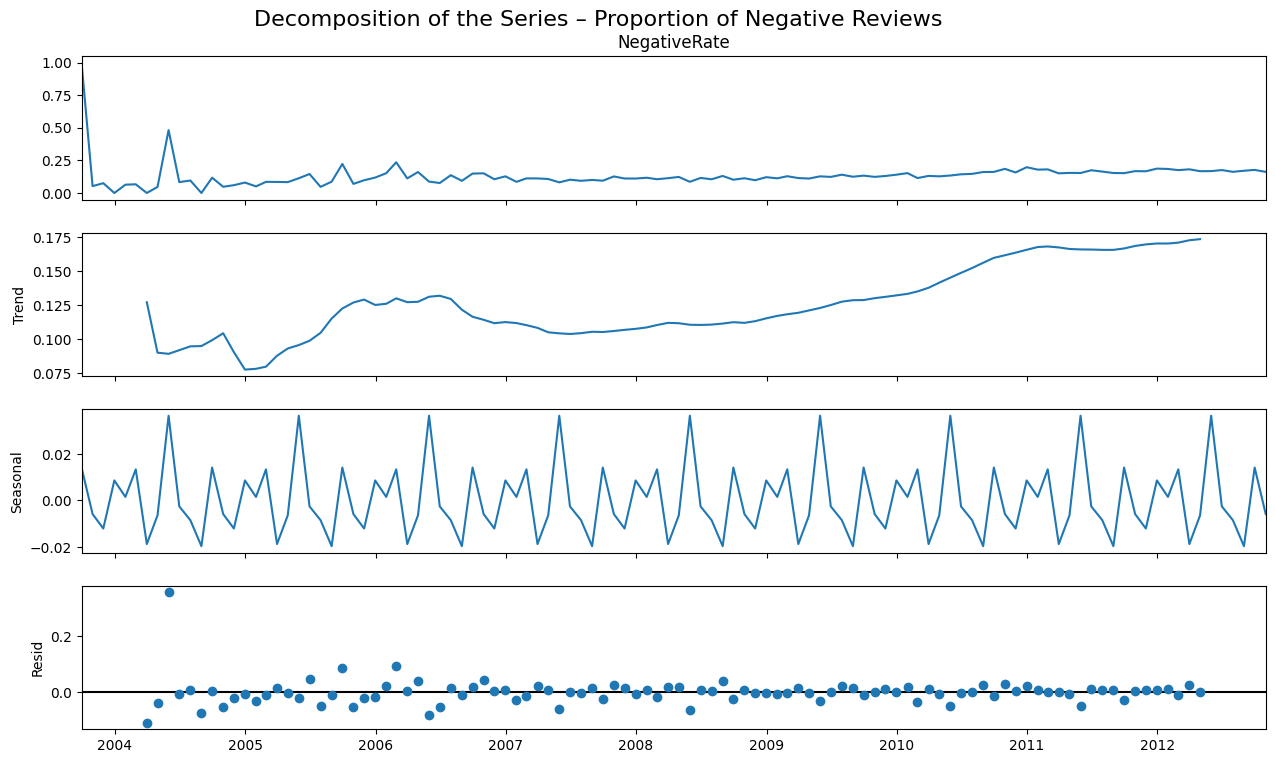

******************************************************************************************************************************************************


In [163]:
# Step: Decompose the 'NegativeRate' time series
decomposition = seasonal_decompose(monthly_data['NegativeRate'], model='additive', period=12)

# Step: Plot the decomposition components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
print("*" * 150)
plt.suptitle('Decomposition of the Series – Proportion of Negative Reviews', fontsize=16)
plt.show()
print("*" * 150)

******************************************************************************************************************************************************


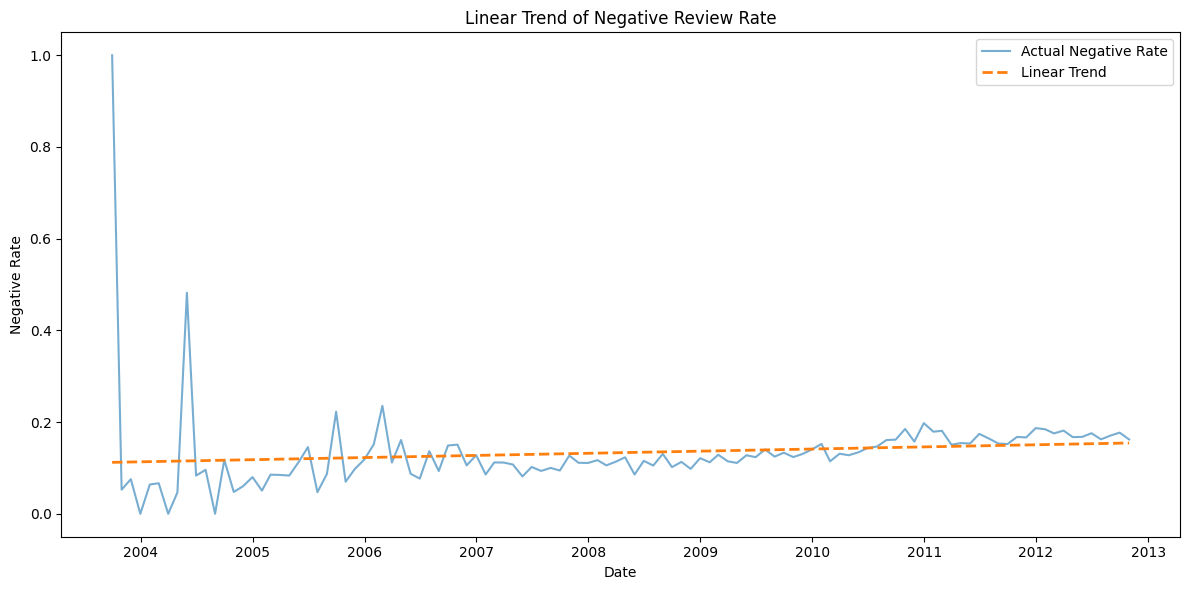

******************************************************************************************************************************************************


In [164]:
# Step: Reset index to use datetime as numeric input
monthly_data_reset = monthly_data.reset_index()
monthly_data_reset['DateOrdinal'] = monthly_data_reset['Date'].map(pd.Timestamp.toordinal)
X = monthly_data_reset['DateOrdinal'].values.reshape(-1, 1)
y = monthly_data_reset['NegativeRate'].values

# Step: Fit regression
reg_model = LinearRegression()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)

# Step: Plot regression
print("*" * 150)
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_reset['Date'], y, label='Actual Negative Rate', alpha=0.6)
plt.plot(monthly_data_reset['Date'], y_pred, label='Linear Trend', linestyle='--', linewidth=2)
plt.title('Linear Trend of Negative Review Rate')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()
print("*" * 150)

******************************************************************************************************************************************************


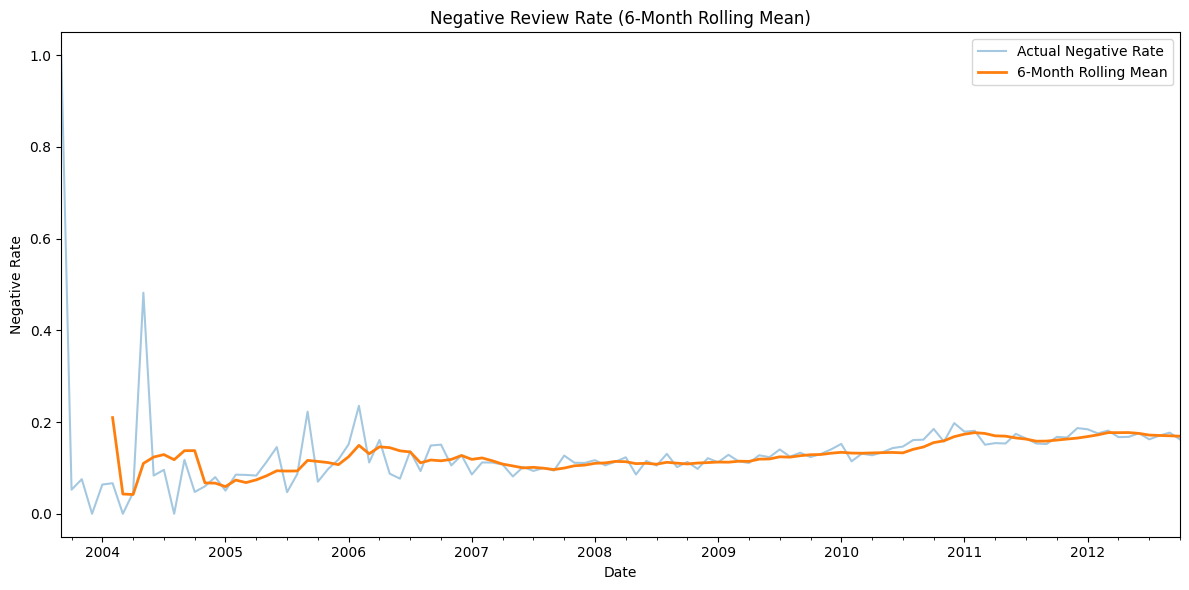

******************************************************************************************************************************************************


In [165]:
# Step: Rolling Mean (6 months, but adjustable)
print("*" * 150)
plt.figure(figsize=(12, 6))
monthly_data['NegativeRate'].plot(label='Actual Negative Rate', alpha=0.4)
monthly_data['NegativeRate'].rolling(window=6).mean().plot(label='6-Month Rolling Mean', linewidth=2)
plt.title('Negative Review Rate (6-Month Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()
print("*" * 150)

******************************************************************************************************************************************************


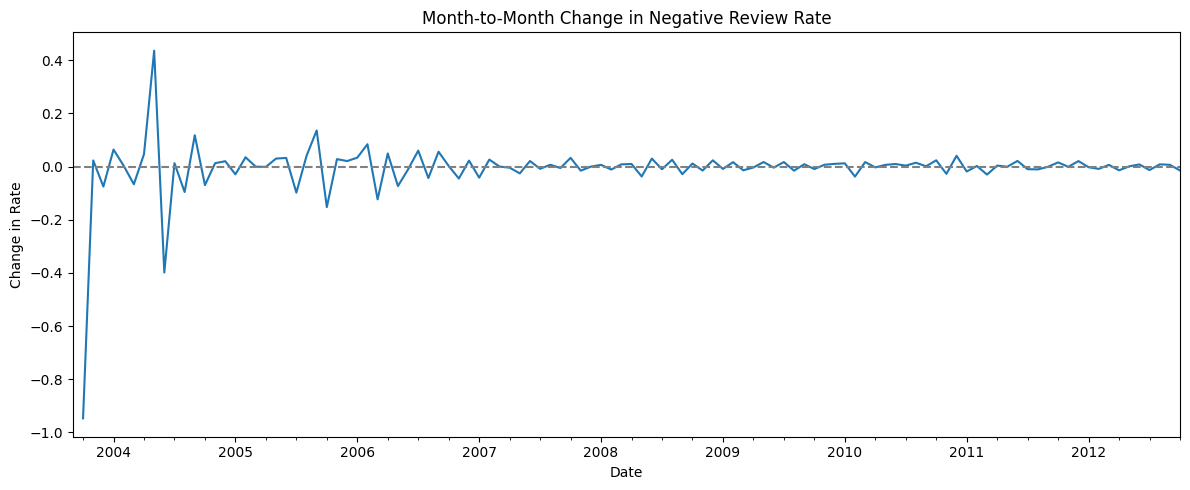

******************************************************************************************************************************************************


In [166]:
# Step: Monthly Change in Negative Rate (First Difference)
print("*" * 150)
monthly_data['NegativeRate_Change'] = monthly_data['NegativeRate'].diff()
plt.figure(figsize=(12, 5))
monthly_data['NegativeRate_Change'].plot()
plt.axhline(0, color='gray', linestyle='--')
plt.title('Month-to-Month Change in Negative Review Rate')
plt.xlabel('Date')
plt.ylabel('Change in Rate')
plt.tight_layout()
plt.show()
print("*" * 150)


=== Stationarity Tests (d=0) ===
ADF: Statistic = -3.4147, p-value = 0.0105
KPSS: Statistic = 0.3415, p-value = 0.1000


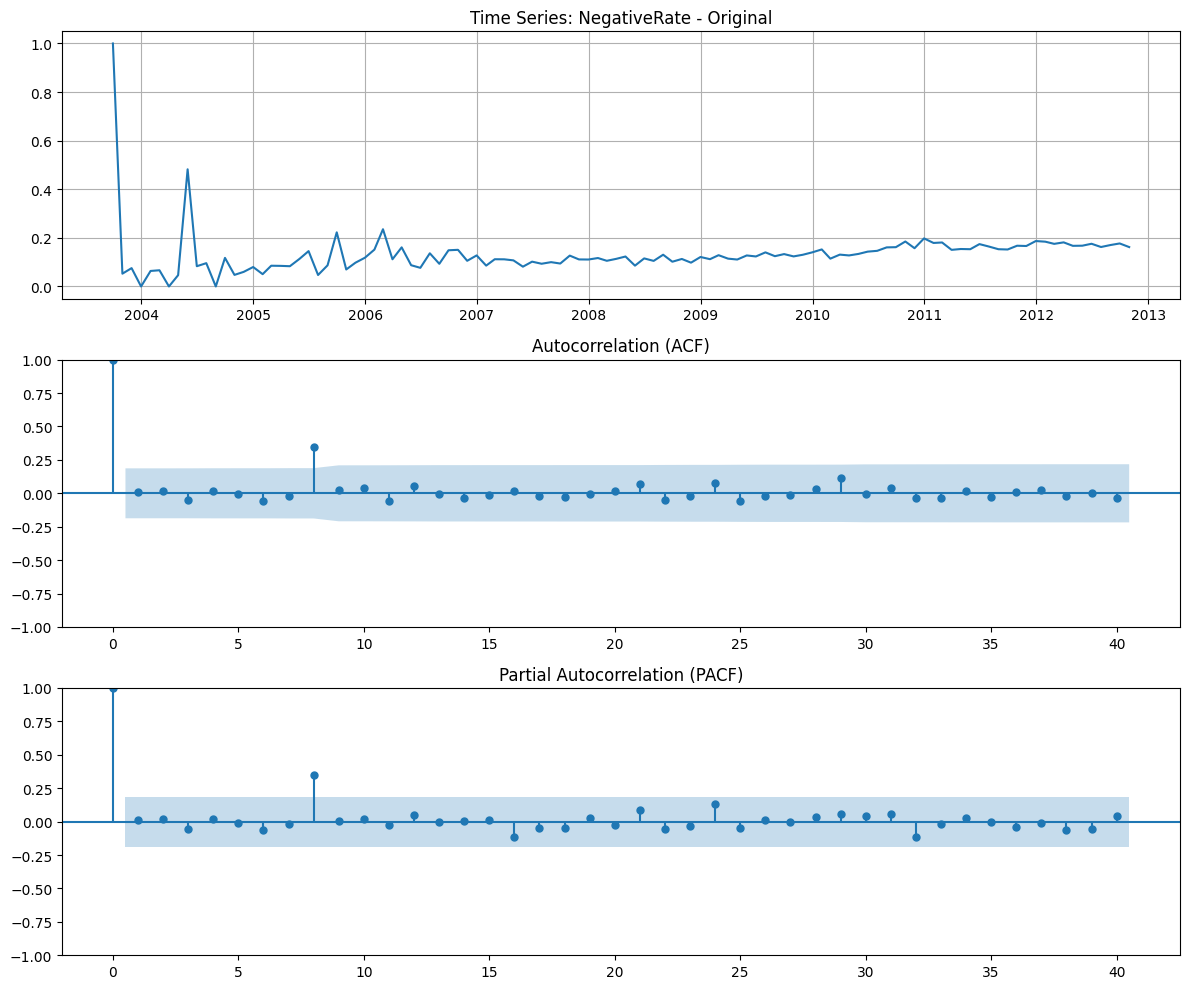


=== Stationarity Tests (d=1) ===
ADF: Statistic = -9.9598, p-value = 0.0000
KPSS: Statistic = 0.2554, p-value = 0.1000


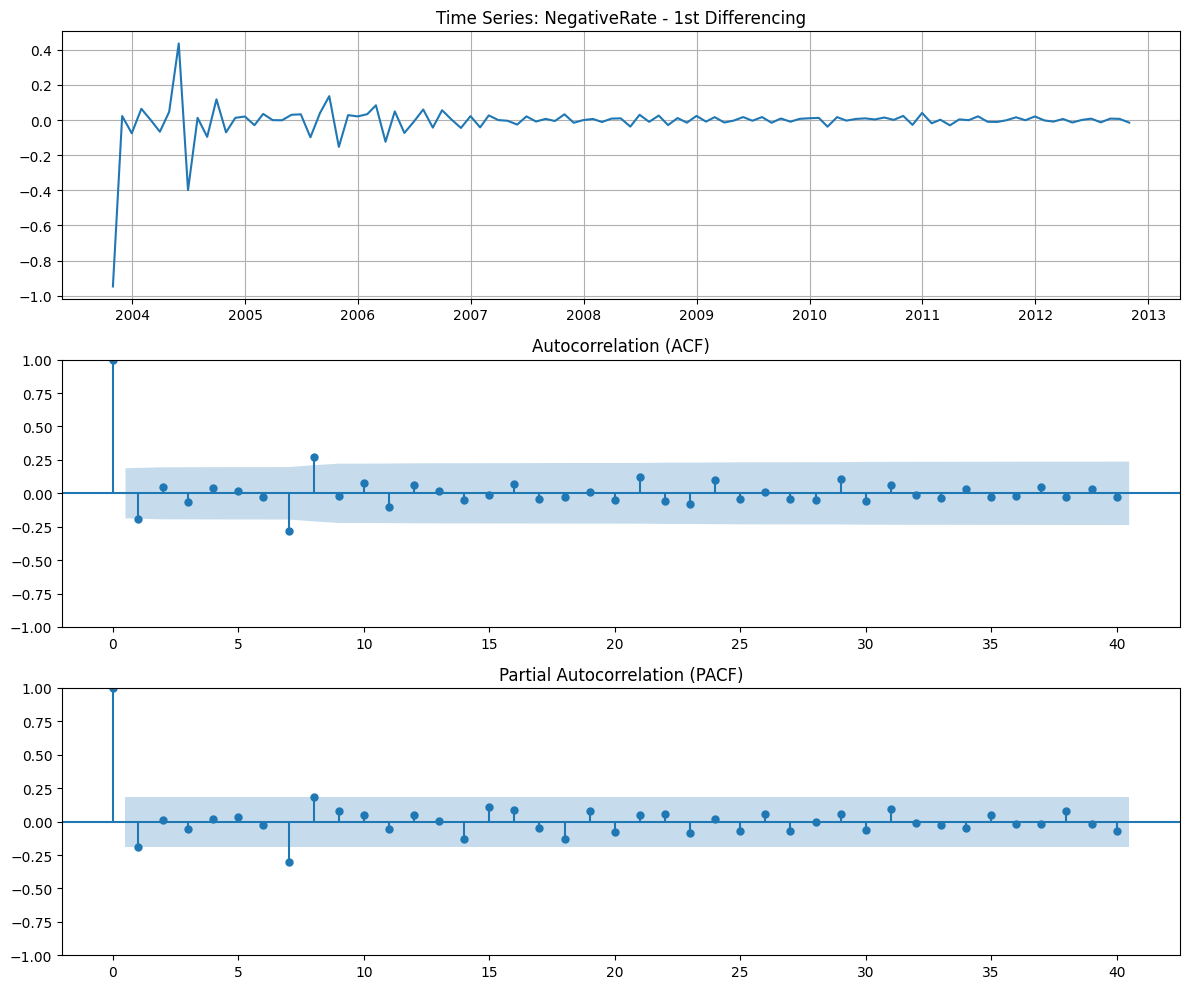


 Final Differencing Needed for Stationarity (d): 1


In [167]:
    # ============================================
    # Stationarity Analysis with Iterative Differencing (ADF & KPSS)
    # ============================================
    
    # Step: Function to plot time series, ACF and PACF
    def plot_series(series, title, lags=40):
        fig, ax = plt.subplots(3, 1, figsize=(12, 10))
        ax[0].plot(series)
        ax[0].set_title(f'Time Series: {title}')
        ax[0].grid(True)
        plot_acf(series, lags=lags, ax=ax[1])
        ax[1].set_title('Autocorrelation (ACF)')
        plot_pacf(series, lags=lags, ax=ax[2], method='ywm')
        ax[2].set_title('Partial Autocorrelation (PACF)')
        plt.tight_layout()
        plt.show()
    
    # Step: Function to run stationarity tests
    def test_stationarity(series, d=0):
        print(f'\n=== Stationarity Tests (d={d}) ===')
        # ADF Test
        adf_result = adfuller(series.dropna())
        print(f'ADF: Statistic = {adf_result[0]:.4f}, p-value = {adf_result[1]:.4f}')
        # KPSS Test
        try:
            kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
            print(f'KPSS: Statistic = {kpss_result[0]:.4f}, p-value = {kpss_result[1]:.4f}')
        except Exception as e:
            print(f'KPSS Error: {e}')
    
    # Step: Load your time series (based on your existing variable)
    original_series = monthly_data['NegativeRate'].dropna()
    
    # Step: Analyze the original series
    test_stationarity(original_series, d=0)
    plot_series(original_series, 'NegativeRate - Original')
    
    # Step: Apply iterative differencing if necessary
    d = 0
    diff_series = original_series.copy()
    
    while True:
        if d >= 2:
            print("\nWarning: Series is still not stationary after 2 differences.")
            break
        d += 1
        diff_series = diff_series.diff().dropna()
        test_stationarity(diff_series, d=d)
        plot_series(diff_series, f'NegativeRate - {d}st Differencing' if d == 1 else f'NegativeRate - {d}nd Differencing')
        # Stop condition: ADF p-value < 0.05 and KPSS p-value > 0.05
        if (adfuller(diff_series)[1] < 0.05) and (kpss(diff_series, regression='c')[1] > 0.05):
            break
    print("*" * 150)
    print(f'\n Final Differencing Needed for Stationarity (d): {d}')
    print("*" * 150)

In [362]:
#Step: Check dataset monthly
monthly_data[['NegativeRate']].head()

,NegativeRate
Date,
2003-09-30,1.000000
2003-10-31,0.052632
2003-11-30,0.075472
2003-12-31,0.000000
2004-01-31,0.063830


In [366]:
#Step: Export Dataset monthly
monthly_data[['NegativeRate']].to_csv('negative_rate_series.csv')

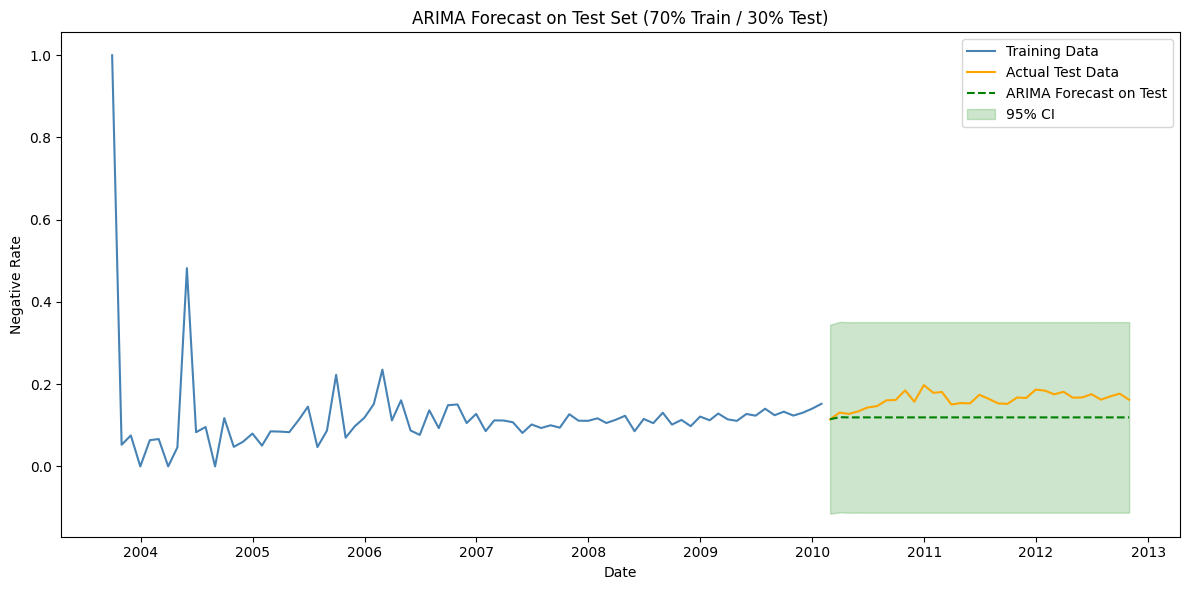

******************************************************************************************************************************************************
ARIMA Performance on Test Set:
MAE: 0.043495
RMSE: 0.047066
MAPE: 25.74%
******************************************************************************************************************************************************


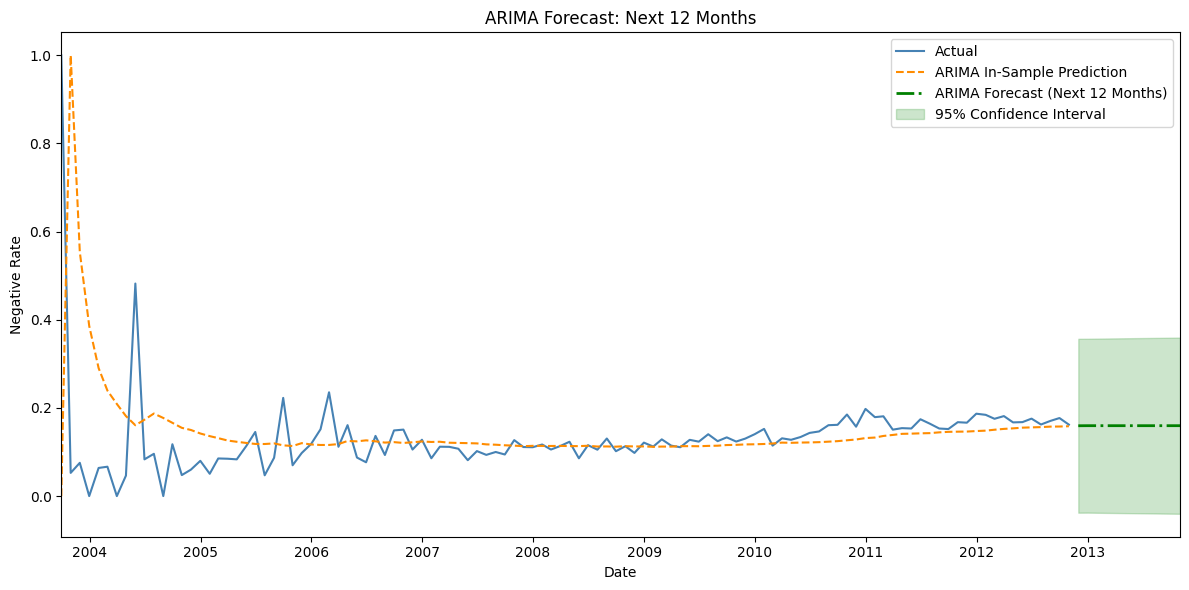

ARIMA Performance on Last 12 Observed Months:
MAE (Last 12): 0.019732
RMSE (Last 12): 0.022393
MAPE (Last 12): 11.16%


In [384]:
# ARIMA (other version of code)


# ============================================
# PART 1 — Evaluation with 70% Train / 30% Test
# ============================================

# Step: Split the data into training and testing (70/30)
split_idx = int(len(monthly_data) * 0.7)
train_data = monthly_data['NegativeRate'][:split_idx]
test_data = monthly_data['NegativeRate'][split_idx:]
test_dates = monthly_data.index[split_idx:]

# Step: Fit ARIMA model 
arima_model_eval = ARIMA(train_data, order=(1,1,1)).fit()  # <-----

# Step: Forecast on test data
forecast_eval = arima_model_eval.get_forecast(steps=len(test_data))
pred_mean_eval = forecast_eval.predicted_mean
conf_int_eval = forecast_eval.conf_int()

# Step: Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='steelblue')
plt.plot(test_dates, test_data, label='Actual Test Data', color='orange')
plt.plot(test_dates, pred_mean_eval, label='ARIMA Forecast on Test', color='green', linestyle='--')
plt.fill_between(test_dates, conf_int_eval.iloc[:, 0], conf_int_eval.iloc[:, 1], color='green', alpha=0.2, label='95% CI')
plt.title('ARIMA Forecast on Test Set (70% Train / 30% Test)')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()


# Step: Actual values (from test set)
y_true = test_data

# Step: Predicted values (from ARIMA forecast on test set)
y_pred_arima = pred_mean_eval

# Step: Calculate MAE
mae_arima = mean_absolute_error(y_true, y_pred_arima)

# Step: Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))

# Step: Corrected MAPE calculation ignoring zero actual values
mape_arima = np.mean(np.abs((y_true[y_true != 0] - y_pred_arima[y_true != 0]) / y_true[y_true != 0])) * 100

# Step: Print the results
print("*" * 150)
print(f"ARIMA Performance on Test Set:")
print(f"MAE: {mae_arima:.6f}")
print(f"RMSE: {rmse_arima:.6f}")
print(f"MAPE: {mape_arima:.2f}%")
print("*" * 150)


# ============================================
# PART 2 — Full Forecast for Next 12 Months
# ============================================



# Step: Ensure the index is in datetime format
monthly_data = monthly_data.copy()
monthly_data.index = pd.to_datetime(monthly_data.index)

# Step: Fit ARIMA on full dataset 
arima_model = ARIMA(monthly_data['NegativeRate'], order=(1,1,1)).fit()

# Step: In-sample fitted values
arima_pred_in = arima_model.fittedvalues

# Step: Forecast next 12 months
forecast_steps = 12
arima_forecast_result = arima_model.get_forecast(steps=forecast_steps)
arima_forecast = arima_forecast_result.predicted_mean
conf_int = arima_forecast_result.conf_int()

# Step: Create future dates
last_date = monthly_data.index[-1]
future_dates = pd.date_range(start=last_date + DateOffset(months=1), periods=forecast_steps, freq='MS')
future_df = pd.DataFrame({'Forecast': arima_forecast.values}, index=future_dates)
conf_int.index = future_dates

# Step: Plot full series + forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['NegativeRate'], label='Actual', color='steelblue')
plt.plot(monthly_data.index, arima_pred_in, label='ARIMA In-Sample Prediction', linestyle='--', color='darkorange')
plt.plot(future_df.index, future_df['Forecast'], label='ARIMA Forecast (Next 12 Months)', linestyle='-.', color='green', linewidth=2)
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2, label='95% Confidence Interval')
plt.xlim(monthly_data.index.min(), future_df.index.max())
plt.title('ARIMA Forecast: Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()


# Step: Metrics on last 12 months
real_last_12_arima = monthly_data['NegativeRate'][-12:]
pred_last_12_arima = arima_model.fittedvalues[-12:]
mae_arima_recent = mean_absolute_error(real_last_12_arima, pred_last_12_arima)
rmse_arima_recent = np.sqrt(mean_squared_error(real_last_12_arima, pred_last_12_arima))
mape_arima_recent = np.mean(np.abs((real_last_12_arima - pred_last_12_arima) / real_last_12_arima)) * 100

# Step: ARIMA - Evaluate last 12 months before forecast
print("=" * 100)
print("ARIMA Performance on Last 12 Observed Months:")
print(f"MAE (Last 12): {mae_arima_recent:.6f}")
print(f"RMSE (Last 12): {rmse_arima_recent:.6f}")
print(f"MAPE (Last 12): {mape_arima_recent:.2f}%")
print("=" * 100)

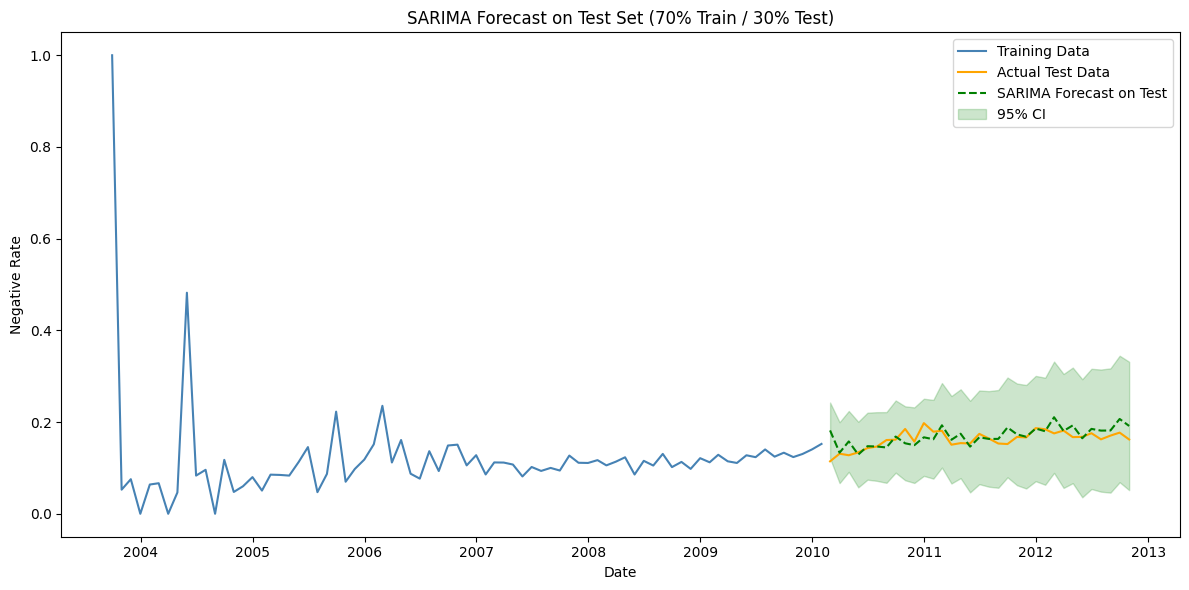

******************************************************************************************************************************************************
SARIMA Performance on Test Set:
MAE: 0.015124
RMSE: 0.021006
MAPE: 9.75%
******************************************************************************************************************************************************


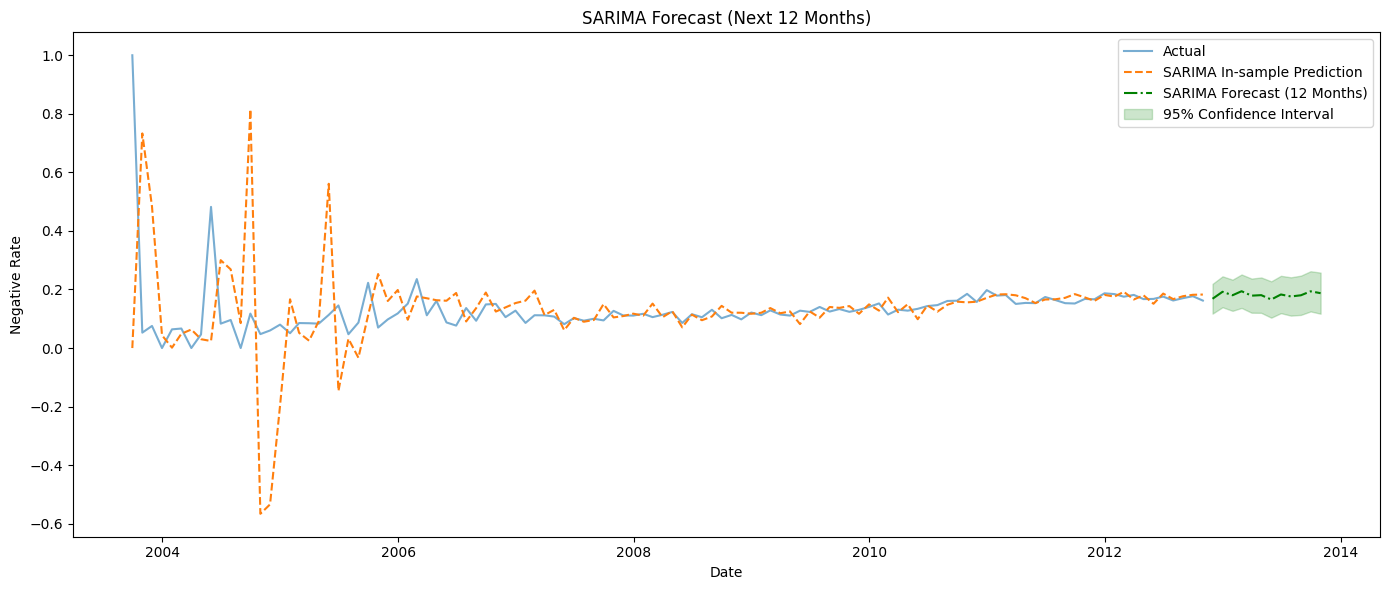

In [385]:
#SARIMA

# ========================================================
# PART 1 — Evaluation with 70% Train / 30% Test
# ========================================================

# Step: Split the data into training and testing (70/30)
split_idx = int(len(monthly_data) * 0.7)
train_data = monthly_data['NegativeRate'][:split_idx]
test_data = monthly_data['NegativeRate'][split_idx:]
test_dates = monthly_data.index[split_idx:]

# Step: Fit SARIMA on training data
sarima_model_eval = SARIMAX(
    train_data,
    order=(2,1,2),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False).fit()

# Step: Forecast for the test set
sarima_forecast_eval = sarima_model_eval.get_forecast(steps=len(test_data))
sarima_pred_test = sarima_forecast_eval.predicted_mean
sarima_conf_int = sarima_forecast_eval.conf_int()

# Step 4: Plot actual vs predicted (test)
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='steelblue')
plt.plot(test_dates, test_data, label='Actual Test Data', color='orange')
plt.plot(test_dates, sarima_pred_test, label='SARIMA Forecast on Test', color='green', linestyle='--')
plt.fill_between(test_dates, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='green', alpha=0.2, label='95% CI')
plt.title('SARIMA Forecast on Test Set (70% Train / 30% Test)')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()

# Step: Actual values (from test set)
y_true = test_data

# Step: Predicted values (from SARIMA forecast on test set)
y_pred_sarima = sarima_pred_test

# Step: Calculate MAE
mae_sarima = mean_absolute_error(y_true, y_pred_sarima)

# Step: Calculate RMSE
rmse_sarima = np.sqrt(mean_squared_error(y_true, y_pred_sarima))

# Step: Corrected MAPE calculation ignoring zero actual values
mape_sarima = np.mean(np.abs((y_true[y_true != 0] - y_pred_sarima[y_true != 0]) / y_true[y_true != 0])) * 100

# Step: Print the results
print("*" * 150)
print("SARIMA Performance on Test Set:")
print(f"MAE: {mae_sarima:.6f}")
print(f"RMSE: {rmse_sarima:.6f}")
print(f"MAPE: {mape_sarima:.2f}%")
print("*" * 150)

# ========================================================
# PART 2 — Full Forecast (Next 12 Months)
# ========================================================

# Step 5: Fit SARIMA on full data
sarima_model_full = sm.tsa.statespace.SARIMAX(
    monthly_data['NegativeRate'],
    order=(2,1,2),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False).fit()

# Step 6: In-sample predictions
sarima_pred_in_sample = sarima_model_full.fittedvalues

# Step 7: Forecast future 12 months
future_dates = [monthly_data.index[-1] + DateOffset(months=i) for i in range(1, 13)]
sarima_forecast = sarima_model_full.get_forecast(steps=12)
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_forecast_ci = sarima_forecast.conf_int()
sarima_forecast_ci.index = future_dates  

# Step 8: Plot actual data, in-sample prediction, forecast, and confidence interval
plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['NegativeRate'], label='Actual', alpha=0.6)
plt.plot(monthly_data.index, sarima_pred_in_sample, label='SARIMA In-sample Prediction', linestyle='--')
plt.plot(future_dates, sarima_forecast_mean, label='SARIMA Forecast (12 Months)', linestyle='-.', color='green')
plt.fill_between(
    future_dates,
    sarima_forecast_ci.iloc[:, 0],
    sarima_forecast_ci.iloc[:, 1],
    color='green',
    alpha=0.2,
    label='95% Confidence Interval')
plt.title('SARIMA Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()

# Step: SARIMA - Evaluate last 12 months before forecast
real_last_12_sarima = monthly_data['NegativeRate'][-12:]
pred_last_12_sarima = sarima_model_full.fittedvalues[-12:]
mae_sarima_recent = mean_absolute_error(real_last_12_sarima, pred_last_12_sarima)
rmse_sarima_recent = np.sqrt(mean_squared_error(real_last_12_sarima, pred_last_12_sarima))
mape_sarima_recent = np.mean(np.abs((real_last_12_sarima - pred_last_12_sarima) / real_last_12_sarima)) * 100


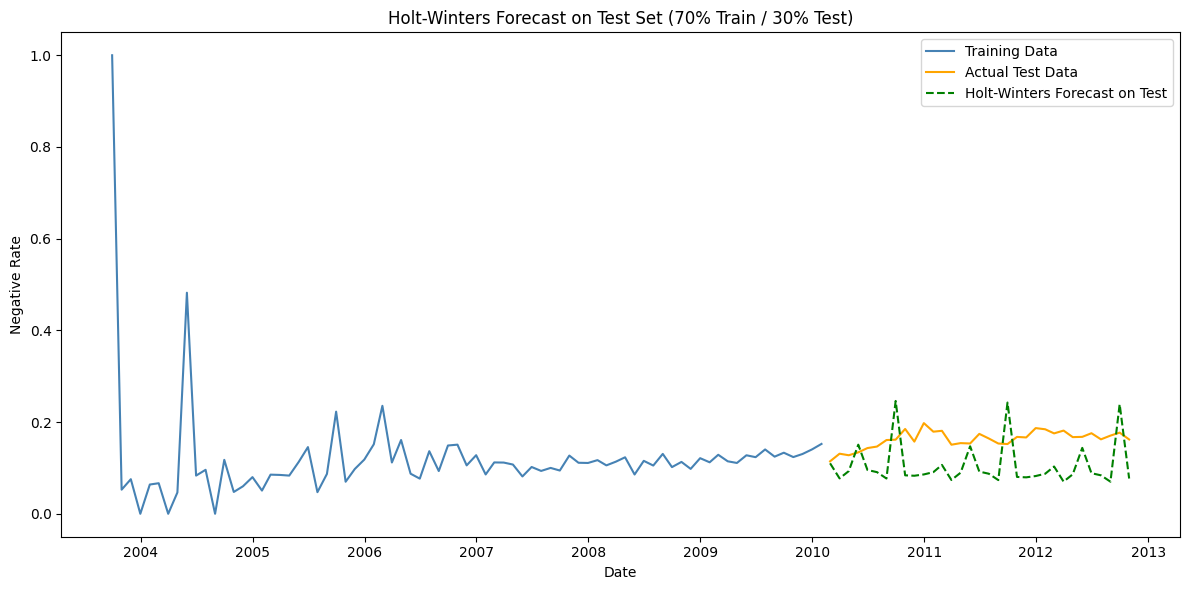

******************************************************************************************************************************************************
Holt-Winters Performance on Test Set:
MAE: 0.072310
RMSE: 0.077489
MAPE: 43.46%
******************************************************************************************************************************************************


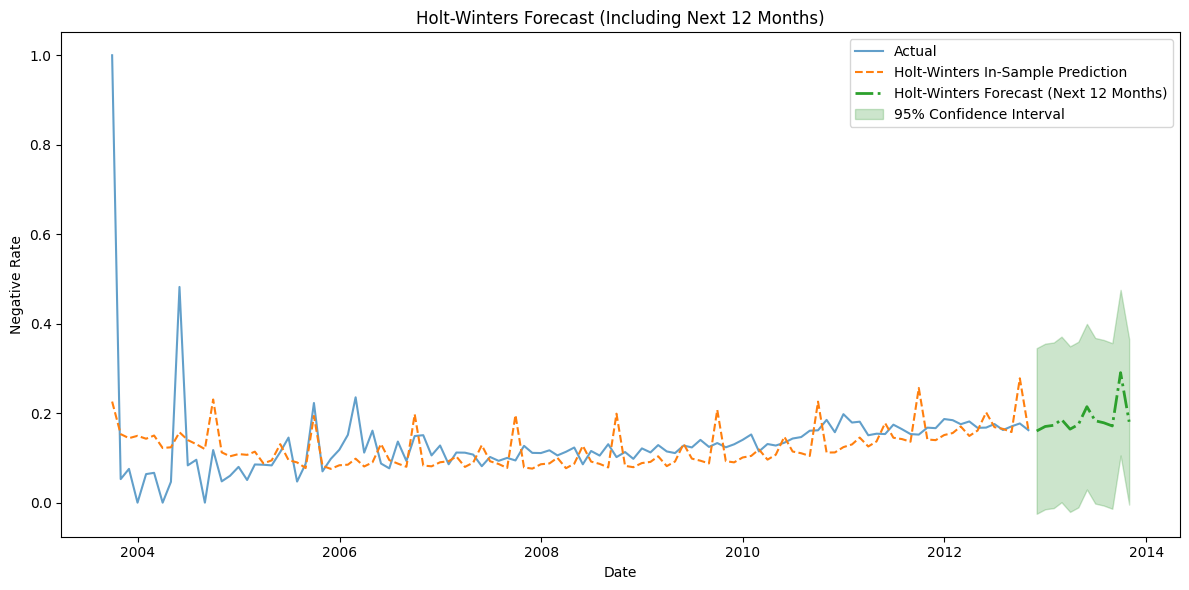

In [386]:
# HOLT - WINTERS

# ========================================================
# PART 1 — Evaluation with 70% Train / 30% Test
# ========================================================

# Step 1: Split the data into training and testing (70/30)
split_idx = int(len(monthly_data) * 0.7)
train_data = monthly_data['NegativeRate'][:split_idx]
test_data = monthly_data['NegativeRate'][split_idx:]
test_dates = monthly_data.index[split_idx:]

# Step 2: Fit Holt-Winters on training data
hw_model_eval = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12 ).fit()

# Step 3: Forecast for the test set
hw_forecast_test = hw_model_eval.forecast(len(test_data))

# Step 4: Plot actual vs predicted (test)
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='steelblue')
plt.plot(test_dates, test_data, label='Actual Test Data', color='orange')
plt.plot(test_dates, hw_forecast_test, label='Holt-Winters Forecast on Test', color='green', linestyle='--')
plt.title('Holt-Winters Forecast on Test Set (70% Train / 30% Test)')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()

# Step: Actual values (from test set)
y_true = test_data

# Step: Predicted values (from Holt-Winters forecast on test set)
y_pred_hw = hw_forecast_test

# Step: Calculate MAE
mae_hw = mean_absolute_error(y_true, y_pred_hw)

# Step: Calculate RMSE
rmse_hw = np.sqrt(mean_squared_error(y_true, y_pred_hw))

# Step: Corrected MAPE calculation ignoring zero actual values
mape_hw = np.mean(np.abs((y_true[y_true != 0] - y_pred_hw[y_true != 0]) / y_true[y_true != 0])) * 100

# Step: Print the results
print("*" * 150)
print("Holt-Winters Performance on Test Set:")
print(f"MAE: {mae_hw:.6f}")
print(f"RMSE: {rmse_hw:.6f}")
print(f"MAPE: {mape_hw:.2f}%")
print("*" * 150)


# ========================================================
# PART 2 — Full Forecast (Next 12 Months)
# ========================================================

# Step 6: Fit Holt-Winters on full data
hw_model_full = ExponentialSmoothing(
    monthly_data['NegativeRate'],
    trend='add',
    seasonal='add',
    seasonal_periods=12).fit()

# Step 7: Generate in-sample prediction
hw_pred_in = hw_model_full.fittedvalues

# Step 8: Forecast the next 12 months
forecast_steps = 12
hw_forecast_future = hw_model_full.forecast(forecast_steps)

# Step 9: Estimate 95% confidence interval
residuals = monthly_data['NegativeRate'] - hw_pred_in
std_error = residuals.std()
conf_int_lower = hw_forecast_future - 1.96 * std_error
conf_int_upper = hw_forecast_future + 1.96 * std_error

# Step 10: Generate future dates
future_dates_hw = [monthly_data.index[-1] + DateOffset(months=i) for i in range(1, 13)]

# Step 11: Plot actual data, in-sample prediction, forecast, and confidence interval
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['NegativeRate'], label='Actual', alpha=0.7)
plt.plot(monthly_data.index, hw_pred_in, label='Holt-Winters In-Sample Prediction', linestyle='--')
plt.plot(future_dates_hw, hw_forecast_future, label='Holt-Winters Forecast (Next 12 Months)', linestyle='-.', linewidth=2)
plt.fill_between(future_dates_hw, conf_int_lower, conf_int_upper, color='green', alpha=0.2, label='95% Confidence Interval')
plt.title('Holt-Winters Forecast (Including Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()


# Step: Holt-Winters - Evaluate last 12 months before forecast
real_last_12_hw = monthly_data['NegativeRate'][-12:]
pred_last_12_hw = hw_model_full.fittedvalues[-12:]
real_last_12_hw = real_last_12_hw[-len(pred_last_12_hw):]
mae_hw_recent = mean_absolute_error(real_last_12_hw, pred_last_12_hw)
rmse_hw_recent = np.sqrt(mean_squared_error(real_last_12_hw, pred_last_12_hw))
mape_hw_recent = np.mean(np.abs((real_last_12_hw - pred_last_12_hw) / real_last_12_hw)) * 100


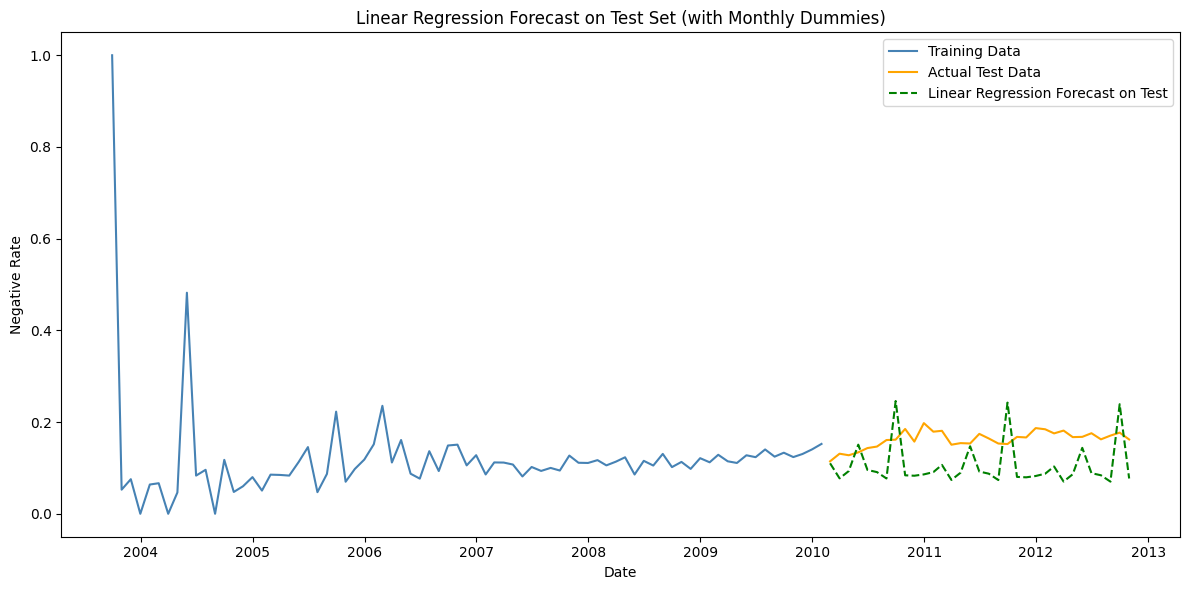

******************************************************************************************************************************************************
Linear Regression Performance on Test Set (with Monthly Dummies):
MAE: 0.072229
RMSE: 0.077408
MAPE: 43.41%
******************************************************************************************************************************************************


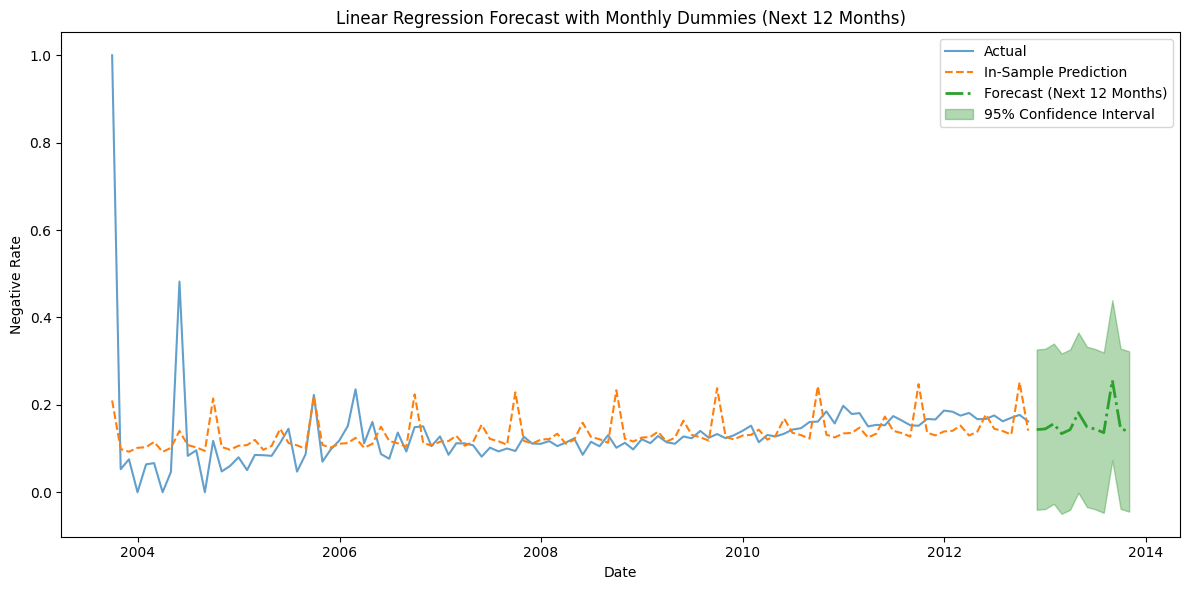

******************************************************************************************************************************************************


In [387]:
# LINEAR REGRESSION

# ========================================================
# PART 1 — Train/Test Evaluation with Monthly Dummies
# ========================================================

# Step: Create time and month dummies
monthly_data['TimeIndex'] = np.arange(len(monthly_data))
monthly_data['Month'] = monthly_data.index.month
month_dummies = pd.get_dummies(monthly_data['Month'], prefix='Month', drop_first=True)
X_dummies = pd.concat([monthly_data[['TimeIndex']], month_dummies], axis=1)

# Step: Split into training and testing sets (70/30)
split_idx = int(len(monthly_data) * 0.7)
X_train = X_dummies.iloc[:split_idx]
X_test = X_dummies.iloc[split_idx:]
y_train = monthly_data['NegativeRate'].iloc[:split_idx]
y_test = monthly_data['NegativeRate'].iloc[split_idx:]
test_dates = monthly_data.index[split_idx:]

# Step: Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step: Predict on test set
y_pred_test = lr_model.predict(X_test)

# Step: Plot actual vs predicted (test set)
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index[:split_idx], y_train, label='Training Data', color='steelblue')
plt.plot(test_dates, y_test, label='Actual Test Data', color='orange')
plt.plot(test_dates, y_pred_test, label='Linear Regression Forecast on Test', linestyle='--', color='green')
plt.title('Linear Regression Forecast on Test Set (with Monthly Dummies)')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()

# Step: Calculate MAE
mae_lr = mean_absolute_error(y_test, y_pred_test)

# Step: Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Step: Corrected MAPE calculation ignoring zero actual values
mape_lr = np.mean(np.abs((y_test[y_test != 0] - y_pred_test[y_test != 0]) / y_test[y_test != 0])) * 100

# Step: Print the results
print("*" * 150)
print("Linear Regression Performance on Test Set (with Monthly Dummies):")
print(f"MAE: {mae_lr:.6f}")
print(f"RMSE: {rmse_lr:.6f}")
print(f"MAPE: {mape_lr:.2f}%")
print("*" * 150)

# ========================================================
# PART 2 — Full Forecast (Next 12 Months)
# ========================================================

# Step: Fit on full dataset
X_full = X_dummies
y_full = monthly_data['NegativeRate']
lr_model_full = LinearRegression()
lr_model_full.fit(X_full, y_full)
lr_pred_in = lr_model_full.predict(X_full)
residuals = y_full - lr_pred_in
std_error = residuals.std()

# Step: Create future dummies and features
future_steps = 12
last_index = len(monthly_data)
future_timeindex = np.arange(last_index, last_index + future_steps)
future_dates = pd.date_range(start=monthly_data.index[-1] + DateOffset(months=1), periods=12, freq='MS')
future_months = pd.Series(future_dates.month)
future_month_dummies = pd.get_dummies(future_months, prefix='Month')

# Ensure all columns are present
for col in month_dummies.columns:
    if col not in future_month_dummies:
        future_month_dummies[col] = 0
future_month_dummies = future_month_dummies[month_dummies.columns]

# Step: Forecast future values
future_X = pd.DataFrame({'TimeIndex': future_timeindex})
future_X = pd.concat([future_X.reset_index(drop=True), future_month_dummies.reset_index(drop=True)], axis=1)
lr_forecast = lr_model_full.predict(future_X)

# Step: Compute confidence interval
ci_range = 1.96 * std_error
conf_int_lower = lr_forecast - ci_range
conf_int_upper = lr_forecast + ci_range

# Step: Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, y_full, label='Actual', alpha=0.7)
plt.plot(monthly_data.index, lr_pred_in, label='In-Sample Prediction', linestyle='--')
plt.plot(future_dates, lr_forecast, label='Forecast (Next 12 Months)', linestyle='-.', linewidth=2)
plt.fill_between(future_dates, conf_int_lower, conf_int_upper, color='green', alpha=0.3, label='95% Confidence Interval')
plt.title('Linear Regression Forecast with Monthly Dummies (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Negative Rate')
plt.legend()
plt.tight_layout()
plt.show()

# Step: Linear Regression - Evaluate last 12 months before forecast
print("*" * 150)
real_last_12_lr = monthly_data['NegativeRate'][-12:]
X_last_12_lr = X_full[-12:]
pred_last_12_lr = lr_model_full.predict(X_last_12_lr)
mae_lr_recent = mean_absolute_error(real_last_12_lr, pred_last_12_lr)
rmse_lr_recent = np.sqrt(mean_squared_error(real_last_12_lr, pred_last_12_lr))
mape_lr_recent = np.mean(np.abs((real_last_12_lr - pred_last_12_lr) / real_last_12_lr)) * 100


In [388]:
# Step: Round and display
print("=" * 100)
print("Model Performance on Test Set (70/30 Split)")
print("=" * 100)
metrics_dict = {
    'ARIMA': {
        'MAE': mae_arima,
        'RMSE': rmse_arima,
        'MAPE (%)': mape_arima},
    'SARIMA': {
        'MAE': mae_sarima,
        'RMSE': rmse_sarima,
        'MAPE (%)': mape_sarima},
    'Holt-Winters': {
        'MAE': mae_hw,
        'RMSE': rmse_hw,
        'MAPE (%)': mape_hw},
    'Linear Regression': {
        'MAE': mae_lr,
        'RMSE': rmse_lr,
        'MAPE (%)': mape_lr}}

# Step: Convert to DataFrame
performance_df = pd.DataFrame(metrics_dict).T

# Step: Round and display
performance_df = performance_df.round(2)
display(performance_df)



# Step: Create dictionary with recent performance metrics
recent_metrics_dict = {
    'ARIMA': {
        'MAE': mae_arima_recent,
        'RMSE': rmse_arima_recent,
        'MAPE (%)': mape_arima_recent},
    'SARIMA': {
        'MAE': mae_sarima_recent,
        'RMSE': rmse_sarima_recent,
        'MAPE (%)': mape_sarima_recent},
    'Holt-Winters': {
        'MAE': mae_hw_recent,
        'RMSE': rmse_hw_recent,
        'MAPE (%)': mape_hw_recent},
    'Linear Regression': {
        'MAE': mae_lr_recent,
        'RMSE': rmse_lr_recent,
        'MAPE (%)': mape_lr_recent}}

# Step: Convert to DataFrame and round
performance_recent_df = pd.DataFrame(recent_metrics_dict).T.round(2)

# Step: Display
print("=" * 100)
print("Recent Model Performance – Last 12 Months Before Forecast")
print("=" * 100)
display(performance_recent_df)

Model Performance on Test Set (70/30 Split)


,MAE,RMSE,MAPE (%)
ARIMA,0.04,0.05,25.74
SARIMA,0.02,0.02,9.75
Holt-Winters,0.07,0.08,43.46
Linear Regression,0.07,0.08,43.41


Recent Model Performance – Last 12 Months Before Forecast


,MAE,RMSE,MAPE (%)
ARIMA,0.02,0.02,11.16
SARIMA,0.01,0.01,6.22
Holt-Winters,0.02,0.04,13.82
Linear Regression,0.04,0.04,20.39


In [389]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Date,Cleaned_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,2011-04-27,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,2012-09-07,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,2008-08-18,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,2011-06-13,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,2012-10-21,great taffy great price wide assortment yummy ...


In [390]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Date,Cleaned_Text,Cleaned_Summary,Text_Label,Cleaned_Label,Summary_Label,Cleaned_Summary_Label
277042,277043,B000NY6Q10,A2AX9Q2M3VCH41,JohnnyDoe,1,1,5,1320451200,THE best white chocolate experience ever...,I am a big fan of white chocolate... When it's...,1,2011-11-05,big fan white chocolate done rightbr br lindt ...,best white chocolate experience ever,1,1,1,1
232681,232682,B000IOJTS2,A25SLEMUNJHC0U,"Sadie E. Allen ""Book-O-Phile""",0,0,4,1344297600,Very Good product,This product has less sugar than the microwave...,1,2012-08-07,product less sugar microwave variety ideal 3yr...,good product,0,0,1,1
85214,85215,B000VI89KO,A1C4J5MRES1KRK,"Jennifer Sanders ""Ethans Mommy""",2,2,5,1192665600,So convenient!,I just love how convenient these bottles are! ...,1,2007-10-18,love convenient bottle keep one diaper bag cas...,convenient,1,0,1,1
70377,70378,B000TQH2A6,A2OGEUVG0BO7LP,"Tracy C. Woodard ""Re: search""",2,2,4,1234224000,Perfect for tea lovers,"It's hard to find K-cups for tea drinkers, so ...",1,2009-02-10,hard find kcups tea drinker really happy find ...,perfect tea lover,1,1,1,1
435049,435050,B002GWHE1I,A38DP9UL4SH70M,Walt,0,0,5,1343260800,Flavors galore,"Only tried a few of the different flavors, but...",1,2012-07-26,tried different flavor distinctive aromatic gr...,flavor galore,1,1,1,1


In [391]:
now2 = datetime.now()
print(now2.strftime("%B %d, %Y %I:%M:%S %p"))
elapsed = now2 - now1
print("Total time:", str(elapsed))

May 10, 2025 01:05:15 AM
Total time: 1 day, 6:39:19.963740
